# Telco Customer Churn Prediction

### TABLE OF CONTENTS
1. Reviewing of Datasets
2. Data Preparation
    - 2.1 Convert 'TotalCharges'column to float
    - 2.2 Checking Null Values
3. Data Exploration
    - 3.1 Target Variables
    - 3.2 Continous Variables
        - 3.2.1 Outlier Check
        - 3.2.2 Continous Variables & Churn
        - 3.2.3 Continous & Continous Variables
    - 3.3 Catergorical Variables
        - 3.3.1 Demographics
        - 3.3.2 Phone Services 
        - 3.3.3 Internet Services 
        - 3.3.4 Additional Internet Services
        - 3.3.5 Customer Payment Preferences
        - 3.3.6 Categorical & Categorical Variables
4. Features Engineering
    - 4.1 Convert binary classification features to 0 and 1
    - 4.2 Change Categorical Data to Frequency
    - 4.3 Train-Test Split & MinMaxScaler
5. Machine Learning
    - 5.1 Logistic Regression
    - 5.2 SVM
    - 5.3 Naive Bayes
    - 5.4 Random Forest
    - 5.5 XG boost
    - 5.6 Result Comparison
6. Hyper-Parameters Tuning
    - 6.1 Random Forest Tuning
        - 6.1.1 Define initial params range
        - 6.1.2 Getting Best Params from RandomSearch
        - 6.1.3 Getting Best Params from GridSearch
        - 6.1.4 Tuned Parameters
    - 6.2 XB Boost Tuning
        - 6.2.1 Define initial params range 
        - 6.2.2 Getting Best Params from RandomSearch
        - 6.2.3 Getting Best Params from GridSearch
        - 6.2.4 Tuned Parameters
7. Conclusion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#For Cramers V calculation
from itertools import combinations
from scipy.stats import chi2_contingency
import scipy.stats as ss

#For machine learning preparation 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

#For model prediction
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#For model evaluation test
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

#For hyperparameter turning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### 1) REVIEWING OF DATASETS

Read dataset files:

In [2]:
telco_churn = pd.read_csv(r'Dataset_(Jia Yang).csv')

Snapshot of the dataset contents:



In [3]:
telco_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
telco_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### 2) DATA PREPARATION

#### 2.1 Convert 'TotalCharges'column to float
We need to convert 'TotalCharges' column to float as it is use for a continous feature

Check for any rows in 'TotalCharges' column that are not numeric:
- Returned 11 records with null values

In [11]:
telco_churn[pd.to_numeric(telco_churn['TotalCharges'], errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Check for any duplicate customerID to make sure these 11 records do not share the same as the rest:
- Returned all records are unique to each other

In [12]:
telco_churn['customerID'].duplicated().value_counts()

False    7043
Name: customerID, dtype: int64

Drop all null values in 'TotalCharges' column:

In [13]:
telco_churn['TotalCharges'] = telco_churn['TotalCharges'].replace(' ', np.nan)
telco_churn2 = telco_churn.dropna(axis=0,subset=['TotalCharges'])  
telco_churn2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Convert 'TotalCharges' column to float:

In [14]:
telco_churn2 = telco_churn2.astype({'TotalCharges': 'float'})
telco_churn2.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

#### 2.2) Checking Null Values

Check for any null values in credit_record:
- No null in all columns

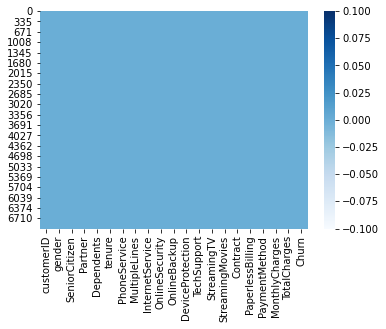

In [15]:
sns.heatmap(telco_churn2.isnull(),cmap="Blues")
plt.show()

### 3) DATA EXPLORATION

In this data exploration, I would like to answert to the following questions:
- What's the churn rate and customers that still in active services?
- Can we see different patterns in churn customers based on the type of demographics?
- Can we see different patterns in churn customers based on the type of service provided?
- Any differences between customers that pay monthly and by year?

Identify what are the Predictor(Input) & Target(output) variables and their data type and category.

| TYPE OF VARIABLE |||||
| - - - | - - - | - - - | - - - | - - - | 
| No. | Variable: |  Variable Type: | Data Type: | Variable Catergory: |
| 1 | gender | Predictor | Character | Categorical | 
| 2 | SeniorCitizen  | Predictor | Numeric | Categorical |  
| 3 | Partner  | Predictor | Character | Categorical |         
| 4 | Dependents  | Predictor | Character  | Categorical |         
| 5 | tenure  | Predictor | Numeric | Contiunous |        
| 6 | PhoneService | Predictor | Character | Categorical |       
| 7 | MultipleLines   | Predictor | Character | Categorical |      
| 8 | InternetService  | Predictor | Character | Categorical |      
| 9 | OnlineSecurity  | Predictor | Character | Categorical |       
| 10| OnlineBackup | Predictor | Character | Categorical |               
| 11| DeviceProtection  | Predictor | Character | Categorical|            
| 12| TechSupport  | Predictor | Character | Categorical |             
| 13| StreamingTV  | Predictor | Character | Categorical |           
| 14| StreamingMovies  | Predictor | Character| Categorical |               
| 15| Contract  | Predictor | Character | Categorical |              
| 16| PaperlessBilling | Predictor | Character | Categorical |          
| 17| PaymentMethod  | Predictor | Character | Categorical |   
| 18| MonthlyCharges | Predictor | Numeric | Contiunous |   
| 19| TotalCharges  | Predictor | Numeric  | Contiunous |   
| 20| Churn  | Target | Character | Categorical |   

#### 3.1) Target Variables 
We are trying to predict if the customer churn. This will be a binary classification problem.


We have a slightly unbalanced target of:

- Churn: No - 73%
- Churn: Yes - 27%

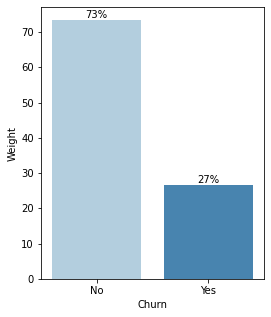

In [10]:
churn_rate = telco_churn2.copy()
churn_rate['Counts'] = np.zeros(len(churn_rate)) 
churn_rate = churn_rate.groupby(['Churn']).count().reset_index()
churn_rate['Weight'] = churn_rate.Counts / churn_rate.Counts.sum() * 100

plt.figure(figsize=(4, 5))
ax = sns.barplot(x='Churn' , y='Weight',data=churn_rate, palette='Blues')

for p in ax.patches:
   ax.annotate('{:.0%}'.format(p.get_height()/100), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

#### 3.2) Continous Variables
Lets understand the central tendency and spread of the variable for each Continuous Variables

##### 3.2.1 Outlier Check

Based from the boxplots, no outlier found for all contiunous features

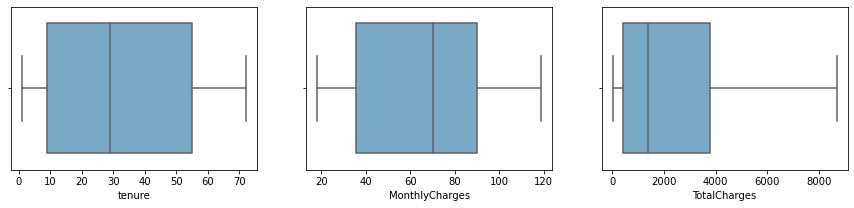

In [11]:
fig, ax= plt.subplots(ncols =3, figsize= (15,3))

sns.boxplot(x=telco_churn2['tenure'], ax=ax[0], palette='Blues')
sns.boxplot(x=telco_churn2['MonthlyCharges'], ax=ax[1], palette='Blues')
sns.boxplot(x=telco_churn2['TotalCharges'], ax=ax[2], palette='Blues')

plt.show()

##### 3.2.2 Continous Variables & Churn

- From the Tenure boxplot, for customers who do not churn, they tend to stay for a longer tenure with the telco. Most of the customers churn at the starting of the tenture, this might because customer not satisfy with the services hence, drop out at the start. We can more when we explore further
- From the Monthly charges boxplot, higher customers churn rate when the montly charges are high. This might be one of the contribution to the early churn at the start of the tenure
- From the Total charges boxplot, it seems that there is higher churn when the total charges are lower. This can also further indicate that most customers churn at start of tenure as total charges increase across the tenure. we will know more below

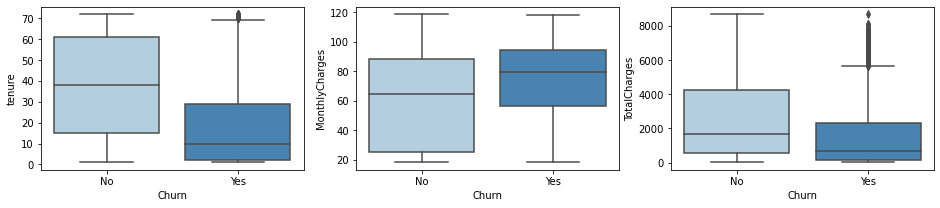

In [12]:
fig, ax= plt.subplots(ncols =3, figsize= (16,3))

sns.boxplot(x="Churn", y="tenure", data=telco_churn2, ax=ax[0], palette='Blues')
sns.boxplot(x="Churn", y="MonthlyCharges", data=telco_churn2, ax=ax[1], palette='Blues')
sns.boxplot(x="Churn", y="TotalCharges", data=telco_churn2, ax=ax[2], palette='Blues')

plt.show()

##### 3.2.3 Continous & Continous Variables


Let us understand more about the correlation between continous features:
- We can see that the total charges increased when tenure increase. It make sense as more year in contract, more charges the customer need to pay.

- Churn were quite distributed across the totalcharges at each tenture

- For Monthly charge to Tenure, we can see more churn at the high side of the monthlycharges at the beginning of the tenure. This answer to our initial finding that high monthlycharge contribute to high churn at the start of the tenure

- More churn at the start of the total charges, this could be due to the high monthly charges at the begining of the tenure, hence customer churn higher.

- In conclusion, Churn does not effected much by the totalcharges but impact more with the high monthly charges which caused alot customer to churn at the start of the tenure.

We will look into montlycharges with other categorical features later

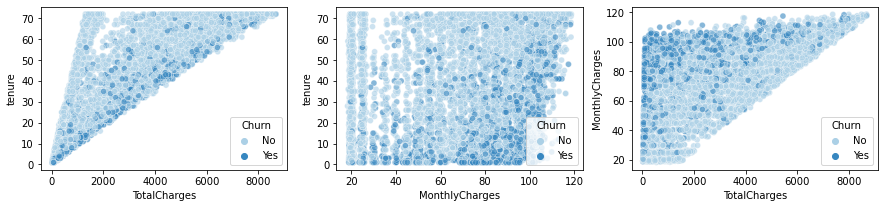

In [14]:
fig, ax= plt.subplots(ncols =3, figsize= (15,3))

sns.scatterplot(data=telco_churn2, x='TotalCharges', y='tenure', hue='Churn',alpha=0.6, ax=ax[0], palette='Blues')
sns.scatterplot(data=telco_churn2, x='MonthlyCharges', y='tenure', hue='Churn',alpha=0.6,ax=ax[1], palette='Blues')
sns.scatterplot(data=telco_churn2, x='TotalCharges', y='MonthlyCharges', hue='Churn',alpha=0.6,ax=ax[2], palette='Blues')

plt.show()

#### 3.3) Categorical Variables
For categorical variables, we will use barplot to understand the churn rate for each catergory. 

##### 3.3.1 Demographics

- The churn rates and customer count are almost equal in the case of Male and Females
- There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.
- SeniorCitizen have a much higher churn rate at 42% against 23% for non-senior customers.
- Customers that doesn't have partners & dependents are more likely to churn
- In Conclusion,
    - Gender is not an indicative of churn
    - The percent of churn is higher in case of senior citizens however only 16% of the customers are senior citizen.
    - Customers with Partners and Dependents have lower churn rate as compared to those who don't have partners & Dependents.

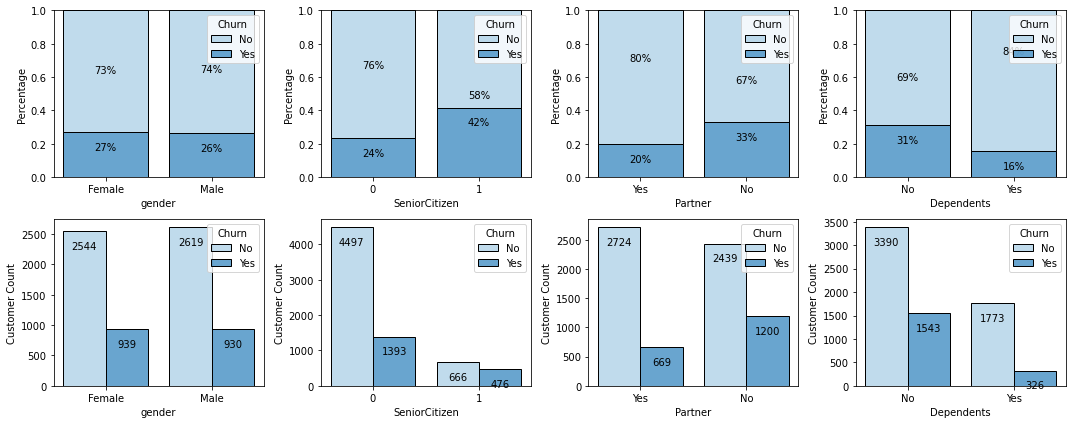

In [15]:
telco_demo = telco_churn2[['gender','SeniorCitizen', 'Partner', 'Dependents','Churn']]
telco_demo = telco_demo.astype({'SeniorCitizen': 'str'})

fig, ax= plt.subplots(nrows =2, ncols =4, figsize= (15,6))


sns.histplot(telco_demo, x='gender', hue='Churn', stat='probability' , multiple='fill', shrink=0.8, ax=ax[0][0], palette='Blues')
sns.histplot(telco_demo, x='SeniorCitizen', hue='Churn', stat='probability' , multiple='fill', shrink=0.8, ax=ax[0][1], palette='Blues')
sns.histplot(telco_demo, x='Partner', hue='Churn', stat='probability' , multiple='fill', shrink=0.8, ax=ax[0][2], palette='Blues')
sns.histplot(telco_demo, x='Dependents', hue='Churn', stat='probability' , multiple='fill', shrink=0.8, ax=ax[0][3], palette='Blues')

sns.histplot(telco_demo, x='gender', hue='Churn', shrink=0.8, multiple="dodge",ax=ax[1][0], palette='Blues')
sns.histplot(telco_demo, x='SeniorCitizen', hue='Churn' , multiple="dodge", shrink=0.8, ax=ax[1][1], palette='Blues')
sns.histplot(telco_demo, x='Partner', hue='Churn', multiple="dodge", shrink=0.8, ax=ax[1][2], palette='Blues')
sns.histplot(telco_demo, x='Dependents', hue='Churn', multiple="dodge", shrink=0.8, ax=ax[1][3], palette='Blues')

fig.tight_layout()

for i in range(4):
    ax[0][i].set_ylabel('Percentage')
    for p in ax[0][i].patches:
        ax[0][i].annotate('{:.0%}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, -15), textcoords = 'offset points')

for j in range(4):
    ax[1][j].set_ylabel('Customer Count')
    for p in ax[1][j].patches:
        ax[1][j].annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, -15), textcoords = 'offset points')

plt.show()

Lets look into Demographics and Monthly Charges:
- High churn occurs at high monthlycharges across all demographic

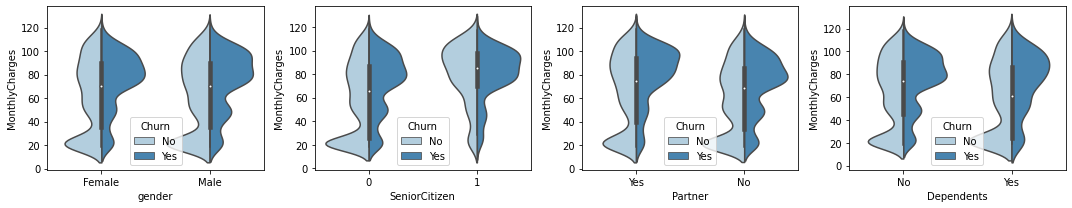

In [16]:
telco_catcon = telco_churn2.copy()
telco_catcon = telco_catcon.astype({'SeniorCitizen': 'str'})

fig, ax= plt.subplots(ncols =4, figsize= (15,3))

sns.violinplot(x="gender", y="MonthlyCharges", hue="Churn", split=True, palette="Blues", data=telco_catcon, ax=ax[0])
sns.violinplot(x="SeniorCitizen", y="MonthlyCharges", hue="Churn", split=True, palette="Blues", data=telco_catcon, ax=ax[1])
sns.violinplot(x="Partner", y="MonthlyCharges", hue="Churn", split=True, palette="Blues", data=telco_catcon, ax=ax[2])
sns.violinplot(x="Dependents", y="MonthlyCharges", hue="Churn", split=True, palette="Blues", data=telco_catcon,ax=ax[3])

fig.tight_layout()

plt.show()

##### 3.3.2 Phone Services

- Churn rates are almost the same across all categories
- Almost 90% of customers holding phone service. 
- And almost equal amount of customers holding multipleline to customers holding only one line.

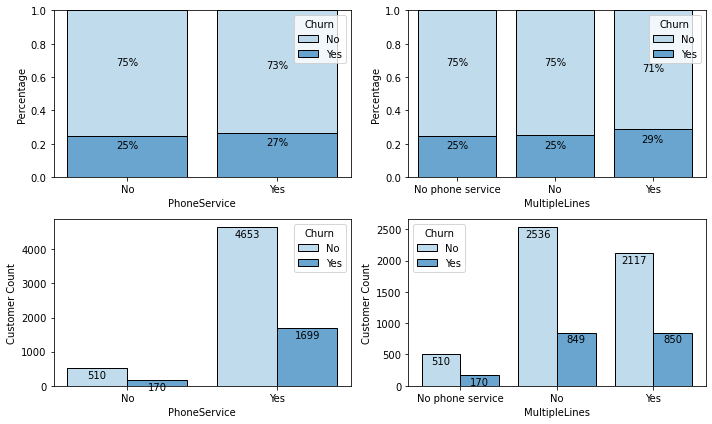

In [17]:
telco_svc = telco_churn2[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Churn']]

fig, ax= plt.subplots(nrows =2,ncols =2, figsize= (10,6))

sns.histplot(telco_svc, x='PhoneService', hue='Churn', stat='probability' , multiple='fill', shrink=0.8, ax=ax[0][0], palette='Blues')
sns.histplot(telco_svc, x='MultipleLines', hue='Churn', stat='probability' , multiple='fill', shrink=0.8, ax=ax[0][1], palette='Blues')

sns.histplot(telco_svc, x='PhoneService', hue='Churn', shrink=0.8, multiple="dodge",ax=ax[1][0], palette='Blues')
sns.histplot(telco_svc, x='MultipleLines', hue='Churn' , multiple="dodge", shrink=0.8, ax=ax[1][1], palette='Blues')

fig.tight_layout()

for i in range(2):
    ax[0][i].set_ylabel('Percentage')
    for p in ax[0][i].patches:
        ax[0][i].annotate('{:.0%}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, -10), textcoords = 'offset points')

for j in range(2):
    ax[1][j].set_ylabel('Customer Count')
    for p in ax[1][j].patches:
        ax[1][j].annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, -7), textcoords = 'offset points')

plt.show()

Lets look into Phone Services and Monthly Charges:
- Can see customer with phone services also churn with high monthlycharges.


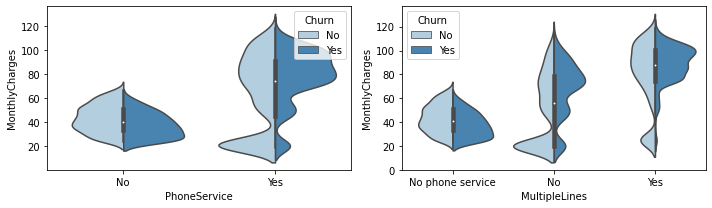

In [18]:
fig, ax= plt.subplots(ncols =2, figsize= (10,3))

sns.violinplot(x="PhoneService", y="MonthlyCharges", hue="Churn", split=True, palette="Blues", data=telco_catcon, ax=ax[0])
sns.violinplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", split=True, palette="Blues", data=telco_catcon, ax=ax[1])

fig.tight_layout()

plt.show()

##### 3.3.3 Internet Services

- Churn rate is much higher with customer subscribed to Fiber Optic InternetServices. This might because customers subscribed to fiber optic are looking at internet speed, hence if it not to performance, customers will choose to churn.
- Customers without internet services will have lesser churn. As customer most likely into only mobile services.

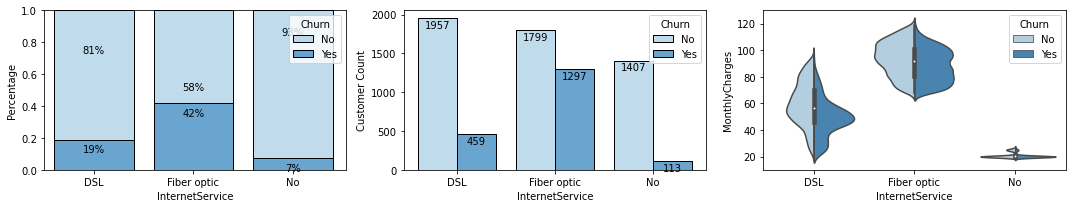

In [19]:
fig, ax= plt.subplots(ncols =3, figsize= (15,3))

sns.histplot(telco_svc, x='InternetService', hue='Churn', stat='probability' , multiple='fill', shrink=0.8, ax=ax[0], palette='Blues')
sns.histplot(telco_svc, x='InternetService', hue='Churn', shrink=0.8, multiple="dodge",ax=ax[1], palette='Blues')
sns.violinplot(x="InternetService", y="MonthlyCharges", hue="Churn", split=True, palette="Blues", data=telco_catcon,ax=ax[2])

ax[0].set_ylabel('Percentage')
ax[1].set_ylabel('Customer Count')

for p in ax[0].patches:
        ax[0].annotate('{:.0%}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, -10), textcoords = 'offset points')

for p in ax[1].patches:
        ax[1].annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, -7), textcoords = 'offset points')

fig.tight_layout()

plt.show()

##### 3.3.4 Additional Internet Services

- Customers without internet services will have lesser churn. As you had seen above, customer only to look into mobile services and not interestd in interet services, hence lesser churn.
- Customers who do not subscribe to OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport have the highest churn. This may because customers do not feel secure and supported without subsribe to the additional services, hence, churn more.

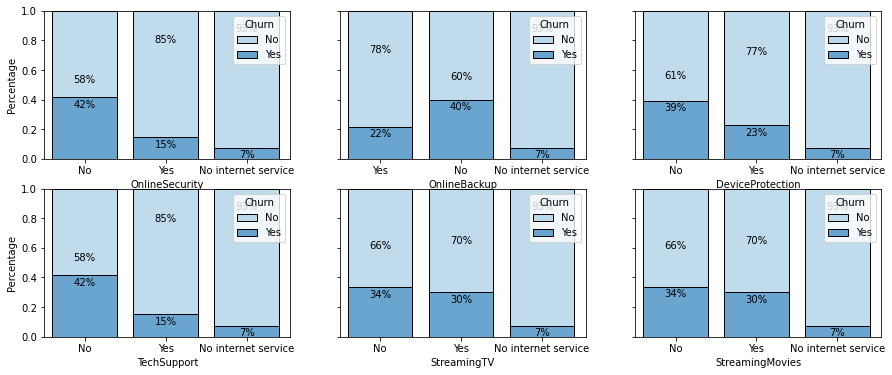

In [20]:
fig, ax= plt.subplots(nrows = 2, ncols =3, sharey=True, figsize= (15,6))

sns.histplot(telco_svc, x='OnlineSecurity', hue='Churn', stat='probability' , multiple='fill', shrink=0.8, ax=ax[0][0], palette='Blues')
sns.histplot(telco_svc, x='OnlineBackup', hue='Churn', stat='probability' , multiple='fill', shrink=0.8, ax=ax[0][1], palette='Blues')
sns.histplot(telco_svc, x='DeviceProtection', hue='Churn', stat='probability' , multiple='fill', shrink=0.8, ax=ax[0][2], palette='Blues')
sns.histplot(telco_svc, x='TechSupport', hue='Churn', stat='probability' , multiple='fill', shrink=0.8, ax=ax[1][0], palette='Blues')
sns.histplot(telco_svc, x='StreamingTV', hue='Churn', stat='probability' , multiple='fill', shrink=0.8, ax=ax[1][1], palette='Blues')
sns.histplot(telco_svc, x='StreamingMovies', hue='Churn', stat='probability' , multiple='fill', shrink=0.8, ax=ax[1][2], palette='Blues')

ax[0][0].set_ylabel('Percentage')
ax[1][0].set_ylabel('Percentage')

for i in range(2):
    for j in range(3):
        for p in ax[i][j].patches:
            ax[i][j].annotate('{:.0%}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, -7), textcoords = 'offset points')

plt.show()

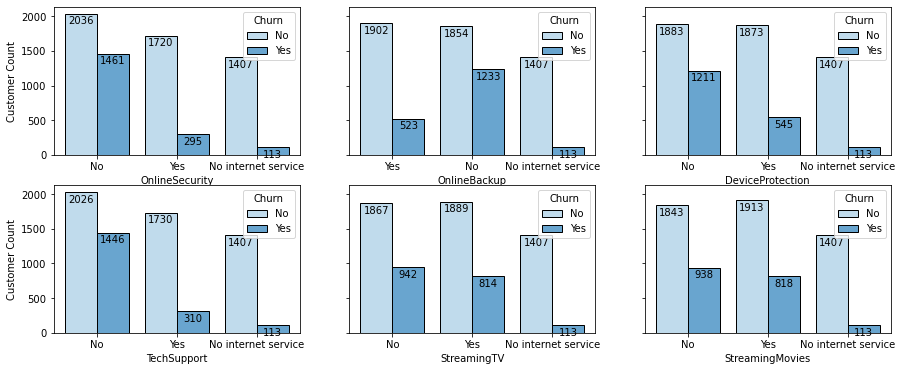

In [21]:
fig, ax= plt.subplots(nrows = 2, ncols =3, sharey=True, figsize= (15,6))

sns.histplot(telco_svc, x='OnlineSecurity', hue='Churn', shrink=0.8, multiple="dodge",ax=ax[0][0], palette='Blues')
sns.histplot(telco_svc, x='OnlineBackup', hue='Churn', shrink=0.8, multiple="dodge",ax=ax[0][1], palette='Blues')
sns.histplot(telco_svc, x='DeviceProtection', hue='Churn', shrink=0.8, multiple="dodge",ax=ax[0][2], palette='Blues')
sns.histplot(telco_svc, x='TechSupport', hue='Churn', shrink=0.8, multiple="dodge",ax=ax[1][0], palette='Blues')
sns.histplot(telco_svc, x='StreamingTV', hue='Churn', shrink=0.8, multiple="dodge",ax=ax[1][1], palette='Blues')
sns.histplot(telco_svc, x='StreamingMovies', hue='Churn', shrink=0.8, multiple="dodge",ax=ax[1][2], palette='Blues')

ax[0][0].set_ylabel('Customer Count')
ax[1][0].set_ylabel('Customer Count')

for i in range(2):
    for j in range(3):
        for p in ax[i][j].patches:
            ax[i][j].annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, -7), textcoords = 'offset points')

plt.show()

Lets look into Additional Internet Services and Monthly Charges:
- Can see customer with high monthlycharges will have high churn across all additional internet services

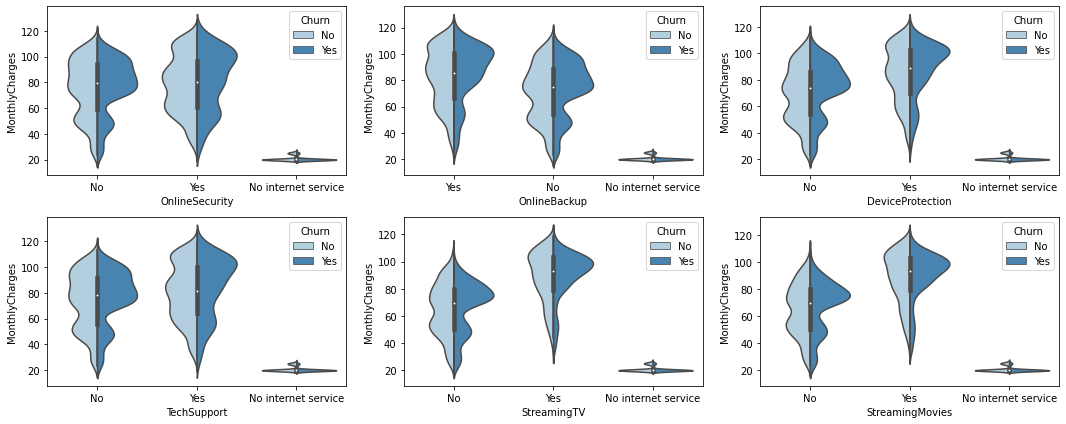

In [22]:
fig, ax= plt.subplots(nrows = 2, ncols =3, figsize= (15,6))

sns.violinplot(x="OnlineSecurity", y="MonthlyCharges", hue="Churn", split=True, palette="Blues", data=telco_catcon,ax=ax[0][0])
sns.violinplot(x="OnlineBackup", y="MonthlyCharges", hue="Churn", split=True, palette="Blues", data=telco_catcon, ax=ax[0][1])
sns.violinplot(x="DeviceProtection", y="MonthlyCharges", hue="Churn", split=True, palette="Blues", data=telco_catcon, ax=ax[0][2])
sns.violinplot(x="TechSupport", y="MonthlyCharges", hue="Churn", split=True, palette="Blues", data=telco_catcon, ax=ax[1][0])
sns.violinplot(x="StreamingTV", y="MonthlyCharges", hue="Churn", split=True, palette="Blues", data=telco_catcon,ax=ax[1][1])
sns.violinplot(x="StreamingMovies", y="MonthlyCharges", hue="Churn", split=True, palette="Blues", data=telco_catcon,ax=ax[1][2])

fig.tight_layout()

plt.show()

##### 3.3.5 Customer Payment Preferences

- Large percent of Customers with monthly subscription have higher churn as compared to Customers with one or two year contract. This maybe customer that signed monthly basis tend to compare plan with other telco regularly and change to any better telco plan.
- Churn rate is higher in case of cutsomers having paperless billing option. This maybe customer not getting use of the paperless billing but the traditional maill in paper billing method.
- Customers payment method is quite even across different catergories. 
- Customers who uses ElectronicCheck payment churn more as compared to other payment options. This maybe customer do not feel comfortable while using check online.

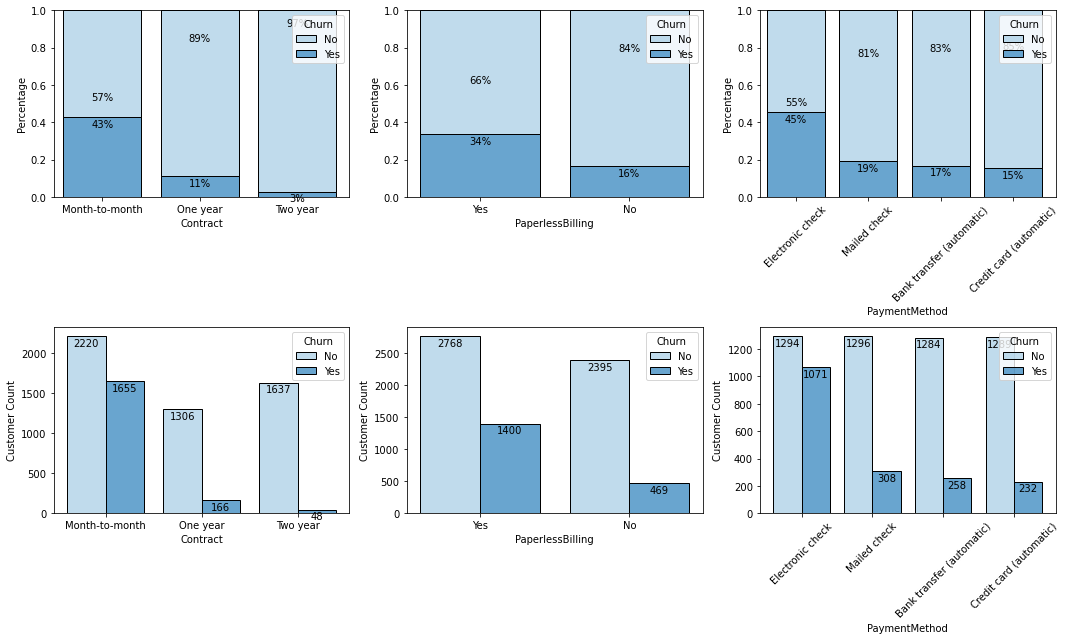

In [16]:
telco_acc = telco_churn2[['Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]

fig, ax= plt.subplots(nrows =2, ncols =3, figsize= (15,9))

sns.histplot(telco_acc, x='Contract', hue='Churn', stat='probability' , multiple='fill', shrink=0.8, ax=ax[0][0], palette='Blues')
sns.histplot(telco_acc, x='PaperlessBilling', hue='Churn', stat='probability' , multiple='fill', shrink=0.8, ax=ax[0][1], palette='Blues')
sns.histplot(telco_acc, x='PaymentMethod', hue='Churn', stat='probability' , multiple='fill', shrink=0.8, ax=ax[0][2], palette='Blues')

sns.histplot(telco_acc, x='Contract', hue='Churn', shrink=0.8, multiple="dodge",ax=ax[1][0], palette='Blues')
sns.histplot(telco_acc, x='PaperlessBilling', hue='Churn' , multiple="dodge", shrink=0.8, ax=ax[1][1], palette='Blues')
sns.histplot(telco_acc, x='PaymentMethod', hue='Churn', multiple="dodge", shrink=0.8, ax=ax[1][2], palette='Blues')

ax[0][2].tick_params(axis='x', labelrotation = 45)
ax[1][2].tick_params(axis='x', labelrotation = 45)

fig.tight_layout()

for i in range(3):
    ax[0][i].set_ylabel('Percentage')
    for p in ax[0][i].patches:
        ax[0][i].annotate('{:.0%}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, -7), textcoords = 'offset points')

for j in range(3):
    ax[1][j].set_ylabel('Customer Count')
    for p in ax[1][j].patches:
        ax[1][j].annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, -7), textcoords = 'offset points')
plt.show()

Lets look into Customer Payment Preferences and Monthly Charges:

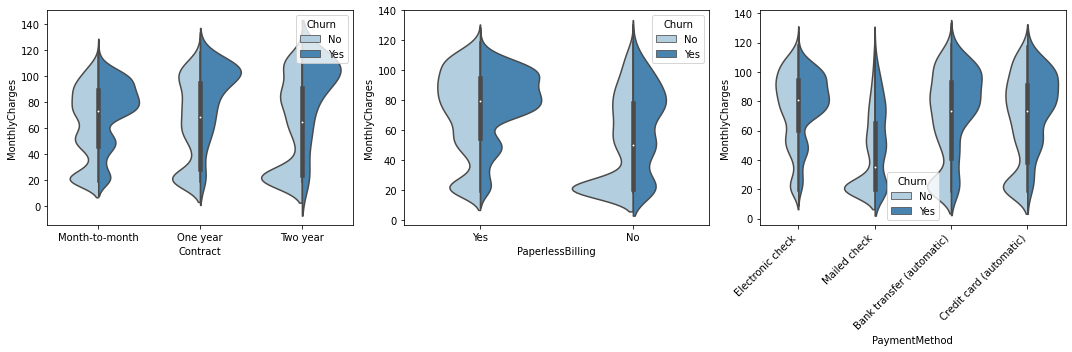

In [24]:
fig, ax= plt.subplots(ncols =3, figsize= (15,5))

sns.violinplot(x="Contract", y="MonthlyCharges", hue="Churn", split=True, palette="Blues", data=telco_catcon, ax=ax[0])
sns.violinplot(x="PaperlessBilling", y="MonthlyCharges", hue="Churn", split=True, palette="Blues", data=telco_catcon, ax=ax[1])
sns.violinplot(x="PaymentMethod", y="MonthlyCharges", hue="Churn", split=True, palette="Blues", data=telco_catcon, ax=ax[2])

plt.xticks(rotation=45, horizontalalignment='right')

fig.tight_layout()

plt.show()

##### 3.3.6 Categorical & Categorical Variables
We will use Cramers V to find degree of association between categorical variables
- 0: The variables are not associated
- 1: The variables are perfectly associated
- 0.25: The variables are weakly associated
- 0.75: The variables are moderately associated

- Internet services are closely associated to each other.
- PhoneService to MultipleLines are perfectly associated. No surpise as MultipleLines is related to the PhoneServices

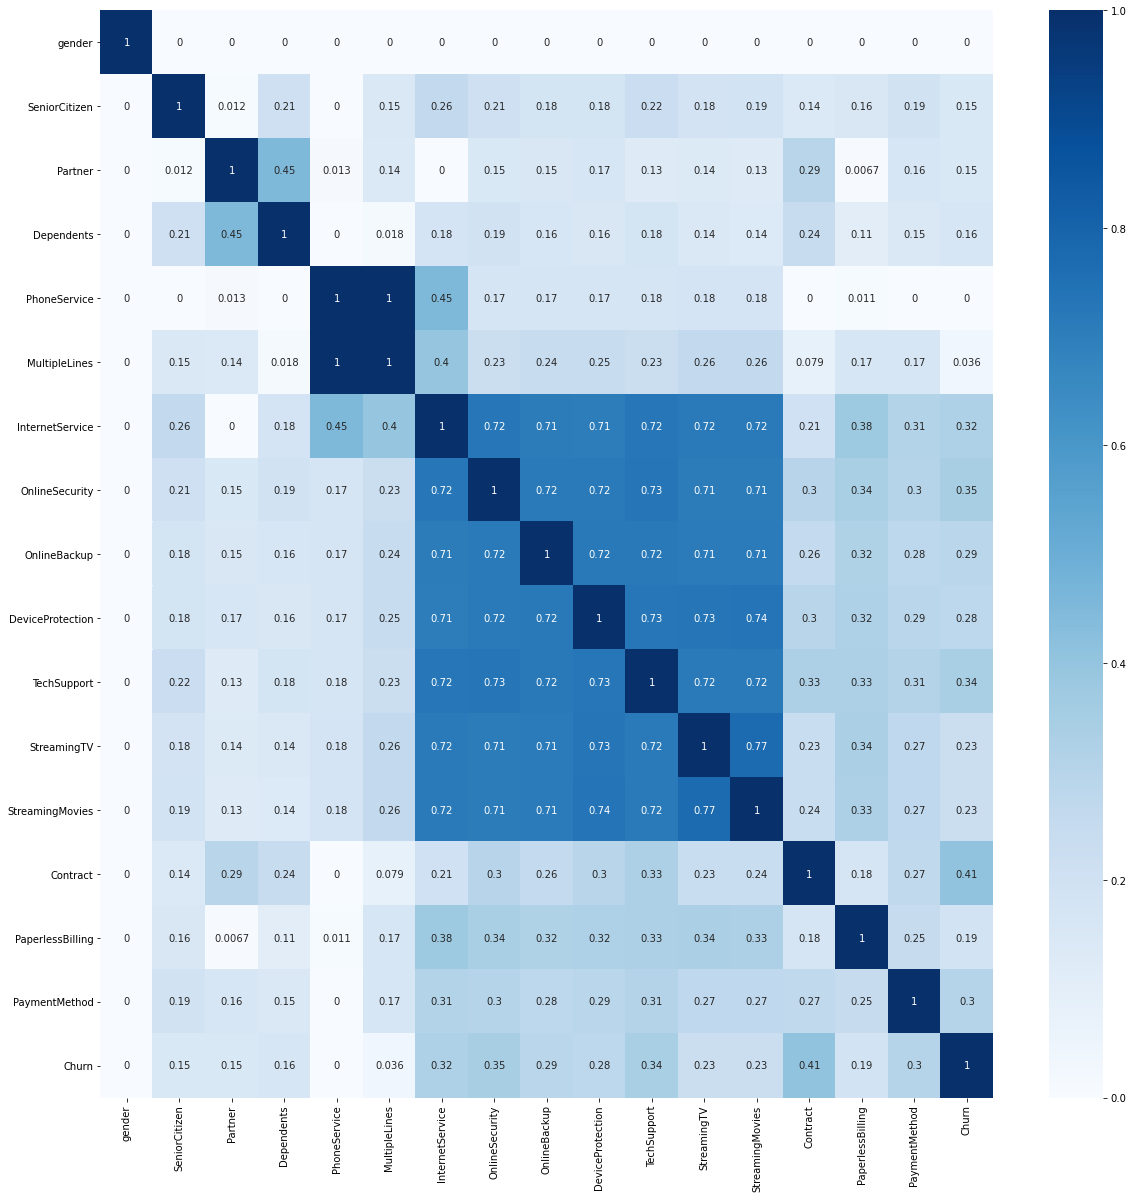

In [25]:
telco_cat = telco_churn2.drop(['tenure','MonthlyCharges','TotalCharges','customerID'],axis='columns')
telco_cat['SeniorCitizen'] = telco_cat.SeniorCitizen.astype(str)

def get_corr_mat(df, f=chi2_contingency):
        columns = df.columns
        dm = pd.DataFrame(index=columns, columns=columns)
        for var1, var2 in combinations(columns, 2):
            cont_table = pd.crosstab(df[var1], df[var2], margins=False)
            chi2_stat = cramers_v(cont_table.values)
            dm.loc[var2, var1] = chi2_stat
            dm.loc[var1, var2] = chi2_stat
        dm.fillna(1, inplace=True)
        return dm

def cramers_v(confusion_matrix):
        """ calculate Cramers V statistic for categorial-categorial association.
            uses correction from Bergsma and Wicher,
            Journal of the Korean Statistical Society 42 (2013): 323-328
        """
        chi2 = ss.chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum()
        phi2 = chi2 / n
        r, k = confusion_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_corr= get_corr_mat(telco_cat)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cat_corr, annot = True, cmap="Blues")
plt.show()

# 4) Features Engineering

#### 4.1 Convert binary classification features to 0 and 1

In [26]:
telco_master = telco_churn2.copy() 

telco_master.gender = telco_master.gender.replace(to_replace=['Female', 'Male'], value=[0, 1])
telco_master.Partner = telco_master.Partner.replace(to_replace=['No', 'Yes'], value=[0, 1])
telco_master.Dependents = telco_master.Dependents.replace(to_replace=['No', 'Yes'], value=[0, 1])
telco_master.PhoneService = telco_master.PhoneService.replace(to_replace=['No', 'Yes'], value=[0, 1])
telco_master.OnlineSecurity = telco_master.OnlineSecurity.replace(to_replace=['No internet service','No', 'Yes'], value=[0, 0, 1])
telco_master.OnlineBackup = telco_master.OnlineBackup.replace(to_replace=['No internet service','No', 'Yes'], value=[0, 0, 1])
telco_master.DeviceProtection = telco_master.DeviceProtection.replace(to_replace=['No internet service','No', 'Yes'], value=[0, 0, 1])
telco_master.TechSupport = telco_master.TechSupport.replace(to_replace=['No internet service','No', 'Yes'], value=[0, 0, 1])
telco_master.StreamingTV = telco_master.StreamingTV.replace(to_replace=['No internet service','No', 'Yes'], value=[0, 0, 1])
telco_master.StreamingMovies = telco_master.StreamingMovies.replace(to_replace=['No internet service','No', 'Yes'], value=[0, 0, 1])
telco_master.PaperlessBilling = telco_master.PaperlessBilling.replace(to_replace=['No', 'Yes'], value=[0, 1])
telco_master.Churn= telco_master.Churn.replace(to_replace=['No', 'Yes'], value=[0, 1])

print(telco_master.apply(lambda col: col.unique()))

customerID          [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
gender                                                         [0, 1]
SeniorCitizen                                                  [0, 1]
Partner                                                        [1, 0]
Dependents                                                     [0, 1]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                   [0, 1]
MultipleLines                             [No phone service, No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                                                 [0, 1]
OnlineBackup                                                   [1, 0]
DeviceProtection                                               [0, 1]
TechSupport                                                    [0, 1]
StreamingTV                                                    [0, 1]
StreamingMovies     

#### 4.2 Change Categorical Data to Frequency
We will use frequency encoder for each column that are non binary classification

In [27]:
#Calculate frequency for each column
enc_mlines = (telco_master.groupby('MultipleLines').size()) / len(telco_master)
enc_internet = (telco_master.groupby('InternetService').size()) / len(telco_master)
enc_contract = (telco_master.groupby('Contract').size()) / len(telco_master)
enc_method = (telco_master.groupby('PaymentMethod').size()) / len(telco_master)

#Include frequency back to column
telco_master['MultipleLines'] = telco_master['MultipleLines'].apply(lambda x : enc_mlines[x])
telco_master['InternetService'] = telco_master['InternetService'].apply(lambda x : enc_internet[x])
telco_master['Contract'] = telco_master['Contract'].apply(lambda x : enc_contract[x])
telco_master['PaymentMethod'] = telco_master['PaymentMethod'].apply(lambda x : enc_method[x])

print(telco_master.apply(lambda col: col.unique()))

customerID          [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
gender                                                         [0, 1]
SeniorCitizen                                                  [0, 1]
Partner                                                        [1, 0]
Dependents                                                     [0, 1]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                   [0, 1]
MultipleLines       [0.09670079635949944, 0.48137087599544937, 0.4...
InternetService     [0.3435722411831627, 0.4402730375426621, 0.216...
OnlineSecurity                                                 [0, 1]
OnlineBackup                                                   [1, 0]
DeviceProtection                                               [0, 1]
TechSupport                                                    [0, 1]
StreamingTV                                                    [0, 1]
StreamingMovies     

#### 4.3 Train-Test Split & MinMaxScaler

In [28]:
#Define predictor features and target feature
cols = ['gender', 'SeniorCitizen','Partner','Dependents','tenure',
        'PhoneService','MultipleLines','InternetService','OnlineSecurity',
        'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
        'PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']

target = "Churn"

#Define X and Y
X = telco_master[cols]
y = telco_master[target]

We will split the data for 70% training and 30% testing

In [29]:
#Split the data for 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

#Fit and transform the data into a scaler for accurate reading and results.
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)

#Oversamplr to make dataset balance
oversample = SMOTE()
X_scaled, y_train = oversample.fit_resample(X_scaled, y_train)
X_test_scaled, y_test= oversample.fit_resample(X_test_scaled, y_test)

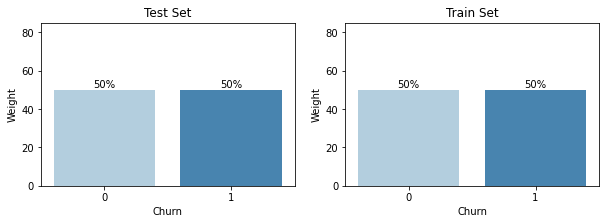

In [30]:
#Visualizing Train-Test dataset to see if 0 & 1 are balanced and equally distributed arcoss train and test set
test = pd.DataFrame(y_test , columns = ['Churn'])
train = pd.DataFrame(y_train , columns = ['Churn'])

test['Counts'] = np.zeros(len(test)) 
test = test.groupby(['Churn']).count().reset_index()
test['Weight'] = test.Counts / test.Counts.sum() * 100

train['Counts'] = np.zeros(len(train)) 
train = train.groupby(['Churn']).count().reset_index()
train['Weight'] = train.Counts / train.Counts.sum() * 100

fig, ax= plt.subplots(ncols =2, figsize= (10,3))

sns.barplot(x='Churn' , y='Weight',data=test, palette='Blues', ax=ax[0])
sns.barplot(x='Churn' , y='Weight',data=train, palette='Blues', ax=ax[1])

ax[0].set(title = "Test Set")
ax[1].set(title = "Train Set")
ax[0].set_ylim([0, 85])
ax[1].set_ylim([0, 85])

for i in range(2):
    for p in ax[i].patches:
        ax[i].annotate('{:.0%}'.format(p.get_height()/100), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
      
        
plt.show() 

# 5) Machine Learning
For classification model, we will try the listed models.
- 5.1) Logistic Regression
- 5.2) SVM
- 5.3) Naive Bayes
- 5.3) Random Forest
- 5.4) XG boost

We will evaluate the model with the listed tests:
- Accuracy
- F1-Score
- ROC / AUC

#### 5.1 Logistic Regression

In [31]:
#Train the model
model1 = LogisticRegression()
logit = model1.fit(X_scaled, y_train)

In [32]:
#Predictions
y_pred_logit = model1.predict(X_test_scaled) 

In [33]:
#Scores
log_acc = metrics.accuracy_score(y_test , y_pred_logit)
log_f1 = metrics.f1_score(y_test , y_pred_logit)

print("Accuracy Logit:", log_acc)
print("Precision Logit:",metrics.precision_score(y_test , y_pred_logit))
print("Recall Logit:",metrics.recall_score(y_test, y_pred_logit))
print("F1 Score Logit:", log_f1)

Accuracy Logit: 0.7707522697795072
Precision Logit: 0.7541083384053561
Recall Logit: 0.8035019455252919
F1 Score Logit: 0.7780219780219781


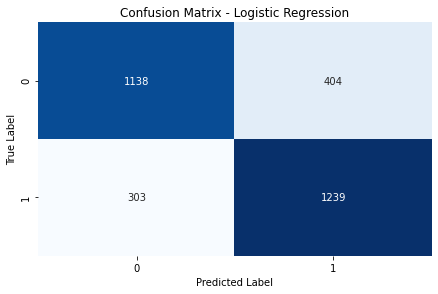

In [34]:
#Print CM
matrix_logit = confusion_matrix(y_test , y_pred_logit)
cm_logit = pd.DataFrame(matrix_logit, index=['0', '1'], columns=['0', '1'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix - Logistic Regression"), plt.tight_layout()
plt.ylabel("True Label"), plt.xlabel("Predicted Label")
plt.show()

AUC Logistic Regression : 0.8539510228937776


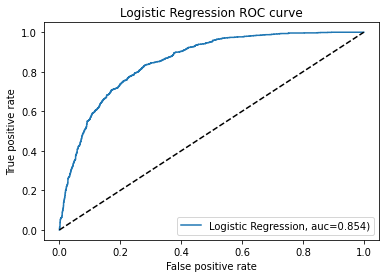

In [35]:
#AUC / ROC
y_pred_logit_proba = model1.predict_proba(X_test_scaled)[::,1]
fpr_logit, tpr_logit, _ = metrics.roc_curve(y_test,  y_pred_logit_proba)
auc_logit = metrics.roc_auc_score(y_test, y_pred_logit_proba)
print("AUC Logistic Regression :", auc_logit)

plt.plot(fpr_logit,tpr_logit,label="Logistic Regression, auc={:.3f})".format(auc_logit))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc=4)
plt.show()

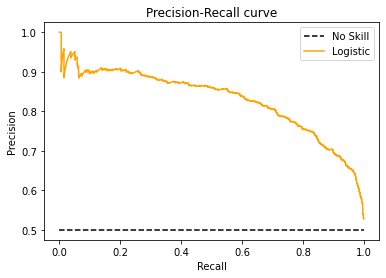

In [36]:
#Precision-Recall
logit_precision, logit_recall, _ = precision_recall_curve(y_test, y_pred_logit_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(logit_recall, logit_precision, color='orange', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

#### 5.2 Support Vector Machine

In [37]:
#Train the model
model2 = SVC(probability=True, kernel='linear')
svm = model2.fit(X_scaled, y_train)

In [38]:
#Predictions
y_pred_svm = model2.predict(X_test_scaled)

In [39]:
#Scores
svm_acc = metrics.accuracy_score(y_test, y_pred_svm)
svm_f1 = metrics.f1_score(y_test, y_pred_svm)

print("Accuracy SVM:", svm_acc)
print("Precision SVM:",metrics.precision_score(y_test, y_pred_svm))
print("Recall SVM:",metrics.recall_score(y_test, y_pred_svm))
print("F1 Score SVM:", svm_f1)

Accuracy SVM: 0.771076523994812
Precision SVM: 0.7453051643192489
Recall SVM: 0.8236057068741893
F1 Score SVM: 0.782501540357363


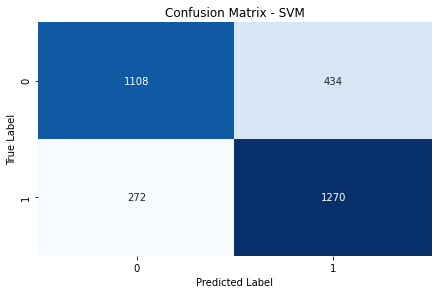

In [40]:
#Print CM
matrix_svm = confusion_matrix(y_test , y_pred_svm)
cm_svm = pd.DataFrame(matrix_svm, index=['0', '1'], columns=['0', '1'])

sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix - SVM"), plt.tight_layout()
plt.ylabel("True Label"), plt.xlabel("Predicted Label")
plt.show()

AUC SVM : 0.8534265806026167


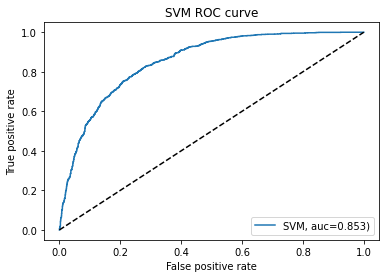

In [41]:
#AUC / ROC
y_pred_svm_proba = model2.predict_proba(X_test_scaled)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test,  y_pred_svm_proba)
auc_svm = metrics.roc_auc_score(y_test, y_pred_svm_proba)
print("AUC SVM :", auc_svm)

#ROC
plt.plot(fpr_svm,tpr_svm,label="SVM, auc={:.3f})".format(auc_svm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc=4)
plt.show()

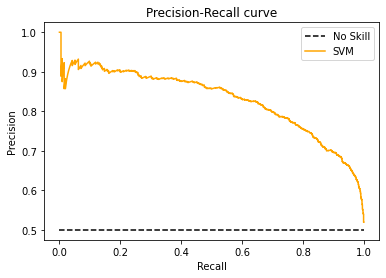

In [42]:
#Precision-Recall
svm_precision, svm_recall, _ = precision_recall_curve(y_test, y_pred_svm_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(svm_recall, svm_precision, color='orange', label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

#### 5.3 Naive Bayes

In [43]:
#Train the model
model3 = GaussianNB()
nb = model3.fit(X_scaled, y_train)

In [44]:
#Predictions
y_pred_nb = model3.predict(X_test_scaled)

In [45]:
#Scores
nb_acc = metrics.accuracy_score(y_test, y_pred_nb)
nb_f1 = metrics.f1_score(y_test, y_pred_nb)

print("Accuracy NB:", nb_acc)
print("Precision NB:",metrics.precision_score(y_test, y_pred_nb))
print("Recall NB:",metrics.recall_score(y_test, y_pred_nb))
print("F1 Score NB:", nb_f1)

Accuracy NB: 0.7681582360570688
Precision NB: 0.7595731324544884
Recall NB: 0.7846952010376135
F1 Score NB: 0.7719298245614036


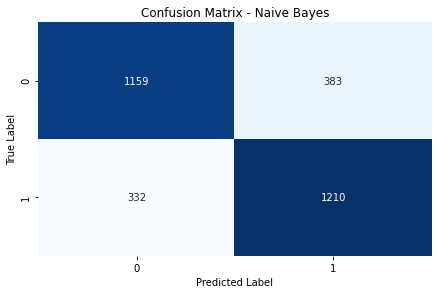

In [46]:
#CM matrix
matrix_nb = confusion_matrix(y_test, y_pred_nb)
cm_nb = pd.DataFrame(matrix_nb, index=['0', '1'], columns=['0', '1'])

sns.heatmap(cm_nb, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix - Naive Bayes"), plt.tight_layout()
plt.ylabel("True Label"), plt.xlabel("Predicted Label")
plt.show()

AUC Naive Bayes : 0.8394807054022182


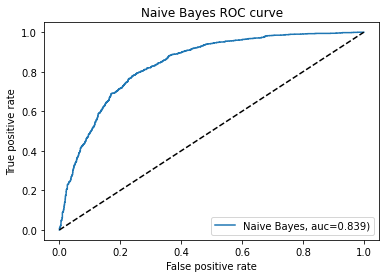

In [47]:
#AUC / ROC
y_pred_nb_proba = model3.predict_proba(X_test_scaled)[::,1]
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test,  y_pred_nb_proba)
auc_nb = metrics.roc_auc_score(y_test, y_pred_nb_proba)
print("AUC Naive Bayes :", auc_nb)

plt.plot(fpr_nb,tpr_nb,label="Naive Bayes, auc={:.3f})".format(auc_nb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Naive Bayes ROC curve')
plt.legend(loc=4)
plt.show()

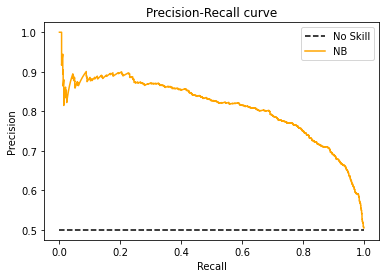

In [48]:
#Precision-Recall
nb_precision, nb_recall, _ = precision_recall_curve(y_test, y_pred_nb_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(nb_recall, nb_precision, color='orange', label='NB')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

#### 5.4 Random Forest

In [49]:
#Train the model
model4 = RandomForestClassifier()
rf = model4.fit(X_scaled, y_train)

In [50]:
#Predictions
y_pred_rf = model4.predict(X_test_scaled)

In [51]:
#Scores
rf_acc = metrics.accuracy_score(y_test, y_pred_rf)
rf_f1 = metrics.f1_score(y_test, y_pred_rf)

print("Accuracy RF:", rf_acc)
print("Precision RF:",metrics.precision_score(y_test, y_pred_rf))
print("Recall RF:",metrics.recall_score(y_test, y_pred_rf))
print("F1 Score RF:", rf_f1)

Accuracy RF: 0.7905317769130998
Precision RF: 0.8308714918759232
Recall RF: 0.7295719844357976
F1 Score RF: 0.7769337016574585


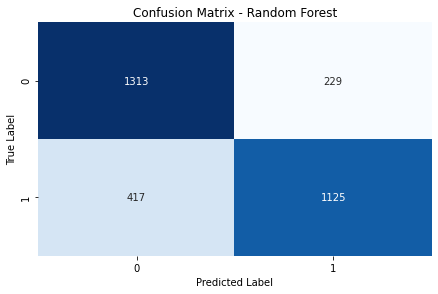

In [52]:
#CM matrix
matrix_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf = pd.DataFrame(matrix_rf, index=['0', '1'], columns=['0', '1'])

sns.heatmap(cm_rf, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix - Random Forest"), plt.tight_layout()
plt.ylabel("True Label"), plt.xlabel("Predicted Label")
plt.show()

AUC Random Forest : 0.8883095631021414


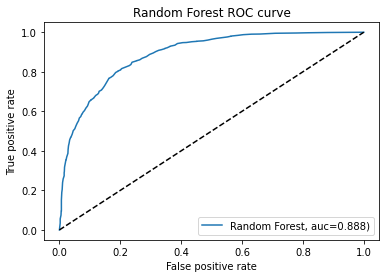

In [53]:
#AUC / ROC
y_pred_rf_proba = model4.predict_proba(X_test_scaled)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_rf_proba)
auc_rf = metrics.roc_auc_score(y_test, y_pred_rf_proba)
print("AUC Random Forest :", auc_rf)

plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc={:.3f})".format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc=4)
plt.show()

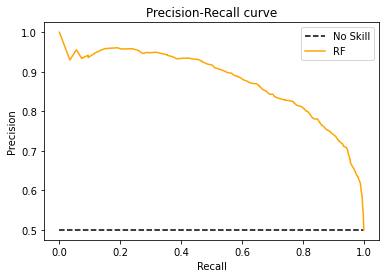

In [54]:
#Precision-Recall
rf_precision, rf_recall, _ = precision_recall_curve(y_test, y_pred_rf_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(rf_recall, rf_precision, color='orange', label='RF')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

#### 5.5 XG boost

In [55]:
#Train the model
model5 = XGBClassifier(objective='binary:logistic')
xgboost = model5.fit(X_scaled, y_train)

In [56]:
#Predictions
y_pred_xgb = model5.predict(X_test_scaled) 

In [57]:
#Scores
xgb_acc = metrics.accuracy_score(y_test, y_pred_xgb)
xgb_f1 = metrics.f1_score(y_test, y_pred_xgb)

print("Accuracy XGB:", xgb_acc)
print("Precision XGB:",metrics.precision_score(y_test, y_pred_xgb))
print("Recall XGB:",metrics.recall_score(y_test, y_pred_xgb))
print("F1 Score XGB:", xgb_f1)

Accuracy XGB: 0.8381971465629053
Precision XGB: 0.8492967180174146
Recall XGB: 0.8223086900129701
F1 Score XGB: 0.8355848434925865


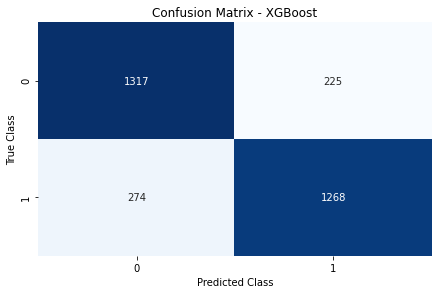

In [58]:
#CM matrix
matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb = pd.DataFrame(matrix_xgb, index=['0', '1'], columns=['0', '1'])

sns.heatmap(cm_xgb, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix - XGBoost"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

AUC XGBoost : 0.9234818930726515


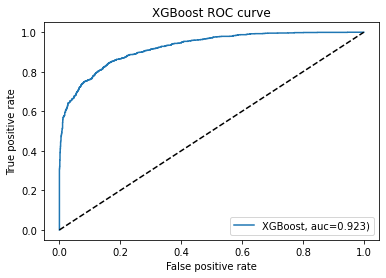

In [59]:
#AUC / ROC
y_pred_xgb_proba = model5.predict_proba(X_test_scaled)[::,1]
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  y_pred_xgb_proba)
auc_xgb = metrics.roc_auc_score(y_test, y_pred_xgb_proba)
print("AUC XGBoost :", auc_xgb)

plt.plot(fpr_xgb,tpr_xgb,label="XGBoost, auc={:.3f})".format(auc_xgb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('XGBoost ROC curve')
plt.legend(loc=4)
plt.show()

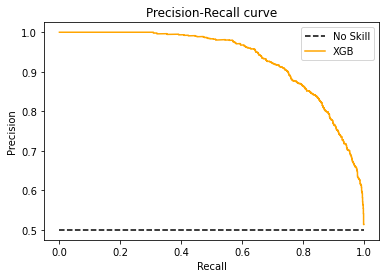

In [60]:
#Precision-Recall
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, y_pred_xgb_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(xgb_recall, xgb_precision, color='orange', label='XGB')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

#### 5.6 Result Comparison
Random Forest and XG Boost has the best performance according to our three classification metrics (Accuracy, F1-score and AUC). Next, we can further improved the both models by tuning hyper-parameters.

In [61]:
print("RESULT COMPARISON TABLE")
print("=======================")

d = {"Accuracy": [log_acc, svm_acc, nb_acc, rf_acc, xgb_acc], 
     "F1 Score": [log_f1, svm_f1, nb_f1, rf_f1, xgb_f1],
     "AUC     ": [auc_logit, auc_svm, auc_nb, auc_rf, auc_xgb]}
     
print ("Test Method:\tLog \tSVM \tNB \tRF \tXGB")
     
for k, v in d.items():
     LOG, SVM, NB, RF, XGB = v
     print(k,"\t%.3f"%LOG,"\t%.3f"%SVM,"\t%.3f"%NB,"\t%.3f"%RF,"\t%.3f"%XGB)

RESULT COMPARISON TABLE
Test Method:	Log 	SVM 	NB 	RF 	XGB
Accuracy 	0.771 	0.771 	0.768 	0.791 	0.838
F1 Score 	0.778 	0.783 	0.772 	0.777 	0.836
AUC      	0.854 	0.853 	0.839 	0.888 	0.923


# HYPER-PARAMETERS TUNING

#### 6.1 Random Forest Tuning
For tuning hyperparameter for Random Forest, we will use and compare Randomsearch and Gridsearch cross validation to get the best parameter.

In [62]:
#Current Random Forest parameter
model4.get_params()  

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### 6.1.1 Define initial params range

In [63]:
# Number of trees in random forest
n_estimators = [100, 500, 1000] #200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [10, 50, 100, None] #10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110

#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree

bootstrap = [True, False]

#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

{'n_estimators': [100, 500, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 50, 100, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

##### 6.1.2 Getting Best Params from RandomSearch

Use the random grid to search for best hyperparameters
1. First create the base model to tune
2. Random search of parameters, using 3 fold cross validation, 
3. search across 100 different combinations, and use all available cores

In [64]:


rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2,
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_scaled, y_train)

#Show parameters after RandomSearch
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 21.1min finished


{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': False}

Define function to calculate error and accuracy between baseline and tuned parameters from RandomSearch.

- There a 0.18% improvement from the randomsearch.cv 

In [65]:
#Define function:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(np.isinf(errors / y_test))
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

#Baseline
print("Baseline:")
base_accuracy = evaluate(model4, X_test_scaled, y_test)
print("\n")

#Random
print("RandomSearch:")
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_scaled, y_test)

print("\n")
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Baseline:
Model Performance
Average Error: 0.2095 degrees.
Accuracy = 92.57%.


RandomSearch:
Model Performance
Average Error: 0.2130 degrees.
Accuracy = 92.74%.


Improvement of 0.18%.


##### 6.1.3 Getting Best Params from GridSearch

In [66]:
param_grid = random_grid

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RandomForestClassifier(), 
                           param_grid = param_grid, 
                           cv = 3, 
                           n_jobs = -1, 
                           verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_scaled, y_train)

#Show best parameters after GridSearch
grid_search.best_params_

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 58.1min
[Parallel(n_jobs=-1)]: Done 1944 out of 1944 | elapsed: 82.1min finished


{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

Calculate error and accuracy between baseline and tuned parameter from GridSearch.
- There a 0.32% improvement from GridSearch.cv
- Hence, GridSearch will give the best tuned result for our model.

In [97]:
#Baseline
print("Baseline:")
base_accuracy = evaluate(model4, X_test_scaled, y_test)
print("\n")

#Grid Search
print("GridSearch:")
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test_scaled, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Baseline:
Model Performance
Average Error: 0.2095 degrees.
Accuracy = 92.57%.


GridSearch:
Model Performance
Average Error: 0.2114 degrees.
Accuracy = 92.87%.
Improvement of 0.32%.


##### 6.1.4 Tuned Parameters
Load best tuned parameters (from GridSearch) into RandomForestClassifier

In [78]:
model4_tuned = RandomForestClassifier(n_estimators= 500,
                                      max_features= 'log2',
                                      max_depth= 100,
                                      min_samples_split= 2,
                                      min_samples_leaf= 1,
                                      bootstrap= False)
  
rf = model4_tuned.fit(X_scaled, y_train)

- From feature importance score, all features have contribution to our target. 
- No much sigificant different between the top 4 features (tenure, MonthlyCharges, Contract & totalCharges)
- Therefore, no need to remove any feature to improve the model

Text(0, 0.5, 'Feature Importance Score')

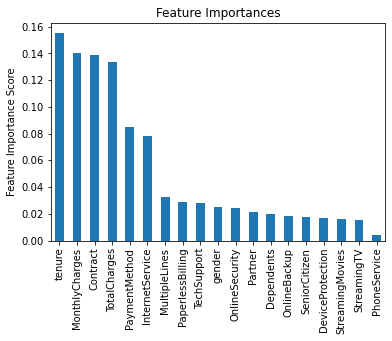

In [98]:
#Plot feature importance 
feat_imp = pd.Series(model4_tuned.feature_importances_, index=X_scaled.columns.tolist()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [82]:
#Prediction for tuned model
y_pred_rf = model4_tuned.predict(X_test_scaled) 

In [83]:
#Scores
rf_acc_2 = metrics.accuracy_score(y_test, y_pred_rf)
rf_f1_2 = metrics.f1_score(y_test, y_pred_rf)

#AUC
y_pred_rf_proba = model4_tuned.predict_proba(X_test_scaled)[::,1]
#fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_rf_proba)
auc_rf_2 = metrics.roc_auc_score(y_test, y_pred_rf_proba)

There almost not improvement before and after tuning.

In [99]:
## Print Base & GridSearch.cv results for comparison
print("RF: BASE & GRIDSEARCH TABLE")
print("=======================")

d = {"Accuracy": [rf_acc, rf_acc_2], 
     "F1 Score": [rf_f1, rf_f1_2],
     "AUC     ": [auc_rf, auc_rf_2]}
     
print ("Test Method:\tBase \tGrid")
     
for k, v in d.items():
     BEF, AFT = v
     print(k,"\t%.3f"%BEF,"\t%.3f"%AFT)

RF: BASE & GRIDSEARCH TABLE
Test Method:	Base 	Grid
Accuracy 	0.791 	0.792
F1 Score 	0.777 	0.777
AUC      	0.888 	0.882


#### 6.2 XGBoost Tuning
Samewise for tuning hyperparameter for XGBoost, we will also compare Randomsearch and Gridsearch cross validation to get the best parameter.

In [85]:
#Current Random Forest parameter
model5.get_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

##### 6.2.1 Define initial params range 

In [86]:
#Maximum depth of a tree
max_depth = [11,15,20]

#Minimum sum of weights of all observations required in a child
min_child_weight = [0,1,2,3]

#Fraction of observations to be randomly samples for each tree
subsample = [0.5, 0.7, 0.9, 1]

#Fraction of columns to be randomly samples for each tree.
colsample_bytree = [0.5, 0.7, 0.9, 1]

#Parameter controls the learning rate. Makes the model more robust by shrinking the weights on each step
eta = [0.3, 0.2, 0.1, 0.05, 0.01, 0.005]


#Create the random grid

random_grid2 = {'max_depth': max_depth,
               'min_child_weight': min_child_weight,
               'subsample': subsample,
               'colsample_bytree': colsample_bytree,
               'eta': eta}

random_grid2

{'max_depth': [11, 15, 20],
 'min_child_weight': [0, 1, 2, 3],
 'subsample': [0.5, 0.7, 0.9, 1],
 'colsample_bytree': [0.5, 0.7, 0.9, 1],
 'eta': [0.3, 0.2, 0.1, 0.05, 0.01, 0.005]}

##### 6.2.2 Getting Best Params from RandomSearch
Use the random grid to search for best hyperparameters
1. First create the base model to tune
2. Random search of parameters, using 3 fold cross validation, 
3. Search across 100 different combinations, and use all available cores

In [75]:


xgb_random = RandomizedSearchCV(estimator = XGBClassifier(), 
                               param_distributions = random_grid2, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2,
                               n_jobs = -1)

# Fit the random search model
xgb_random.fit(X_scaled, y_train)

#Show parameters after RandomSearch
xgb_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.5min finished


{'subsample': 0.9,
 'min_child_weight': 0,
 'max_depth': 15,
 'eta': 0.1,
 'colsample_bytree': 0.9}

Calculate error and accuracy between baseline and tuned parameters from RandomSearch.

- There is no improvement (-0.28%) from the randomsearch.cv 

In [100]:
#Baseline
print("Baseline:")
base_accuracy = evaluate(model5, X_test_scaled, y_test)
print("\n")

#Random
print("RandomSearch:")
best_random = xgb_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_scaled, y_test)

print("\n")
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Baseline:
Model Performance
Average Error: 0.1618 degrees.
Accuracy = 92.70%.


RandomSearch:
Model Performance
Average Error: 0.1910 degrees.
Accuracy = 92.44%.


Improvement of -0.28%.


##### 6.2.3 Getting Best Params from GridSearch

In [87]:
param_grid2 = random_grid2

# Instantiate the grid search model
grid_search2 = GridSearchCV(estimator = XGBClassifier(), 
                           param_grid = param_grid2, 
                           cv = 3, 
                           n_jobs = -1, 
                           verbose = 2)

# Fit the grid search to the data
grid_search2.fit(X_scaled, y_train)

#Show best parameters after GridSearch
grid_search2.best_params_

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 58.2min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed: 62.3min finished


{'colsample_bytree': 0.9,
 'eta': 0.05,
 'max_depth': 20,
 'min_child_weight': 0,
 'subsample': 0.7}

Calculate error and accuracy between baseline and tuned parameter from GridSearch.
- Worst, no improvement (-0.35%) from the gridsearch.cv
- Hence, the baseline will give the best result then the tuned paraemeters for our model.

In [88]:
#Baseline
print("Baseline:")
base_accuracy = evaluate(model5, X_test_scaled, y_test)
print("\n")

#Grid Search
print("GridSearch:")
best_grid = grid_search2.best_estimator_
grid_accuracy = evaluate(best_grid, X_test_scaled, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Baseline:
Model Performance
Average Error: 0.1618 degrees.
Accuracy = 92.70%.


GridSearch:
Model Performance
Average Error: 0.1897 degrees.
Accuracy = 92.38%.
Improvement of -0.35%.


##### 6.2.4 Tuned Parameters
Load best tuned parameters (from RandomSearch) into XGBClassifier

In [101]:
model5_tuned = XGBClassifier(subsample= 0.9,
                             min_child_weight= 0,
                             max_depth= 15,
                             eta= 0.1,
                             colsample_bytree = 0.9)
  
xgb = model5_tuned.fit(X_scaled, y_train)

- From feature importance score, we can see a sigificant importance of the Contract feature as compared to the others features.
- This is the effect of boosting ensemble model as compared to the bagging ensemble model(RandomForest)
- When the correlation between the variables are high, XGB will pick one feature and use it while breaking down the tree further which will ignore other remaining correlated features.
- For Random Forest , the tree is not built from specific features but learn as whole that correlations of different features.


Text(0, 0.5, 'Feature Importance Score')

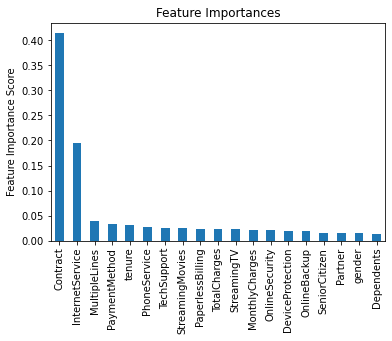

In [102]:
#Plot feature importance 
feat_imp = pd.Series(model5_tuned.feature_importances_, index=X_scaled.columns.tolist()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [91]:
#Prediction for tuned model
y_pred_xgb = model5_tuned.predict(X_test_scaled) 

In [92]:
#Scores
xgb_acc_2 = metrics.accuracy_score(y_test, y_pred_xgb)
xgb_f1_2 = metrics.f1_score(y_test, y_pred_xgb)

#AUC
y_pred_xgb_proba = model5_tuned.predict_proba(X_test_scaled)[::,1]
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  y_pred_xgb_proba)
auc_xgb_2 = metrics.roc_auc_score(y_test, y_pred_xgb_proba)

There almost not improvement before and after tuning.

In [94]:
## Print Base & Gridsearch.cv results for comparison
print("XGB: BASE & RANDOMSEARCH TABLE")
print("=======================")

d = {"Accuracy": [xgb_acc, xgb_acc_2], 
     "F1 Score": [xgb_f1, xgb_f1_2],
     "AUC     ": [auc_xgb, auc_xgb_2]}
     
print ("Test Method:\tBase \tRandom")
     
for k, v in d.items():
     BEF, AFT = v
     print(k,"\t%.3f"%BEF,"\t%.3f"%AFT)
    
#After hyper parameter tune, the base still having the better results.

XGB: BASE & RANDOMSEARCH TABLE
Test Method:	Base 	Random
Accuracy 	0.838 	0.809
F1 Score 	0.836 	0.801
AUC      	0.923 	0.906


### 7) CONCLUSION
- The best model to identify Telco Customer Churn will be XGBoost model with test of ~84% accuracy.
- We will be using XGBoost to predict our values. 
- For futurework, we can look into:
    - Other value range for parameter tuning
    - We can also look into using ensemble of XG Boost and Random Forest to get a more accurate prediction.
    - Look into the feature importance for the top features
    - Do Cost Benefit Analysis to further enhance the practical use of the model

In [95]:
#Print before tune and after tune result for comparison
print("RANDOM FOREST VS XG BOOST")
print("=======================")

d = {"Accuracy": [rf_acc_2, xgb_acc], 
     "F1 Score": [rf_f1_2, xgb_f1],
     "AUC     ": [auc_rf_2, auc_xgb]}
     
print ("Test Method:\tRF \tXGB")
     
for k, v in d.items():
     BEF, AFT = v
     print(k,"\t%.3f"%BEF,"\t%.3f"%AFT)

RANDOM FOREST VS XG BOOST
Test Method:	RF 	XGB
Accuracy 	0.792 	0.838
F1 Score 	0.777 	0.836
AUC      	0.882 	0.923


## THE END